In [1]:
# Load libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import seaborn as sns
import pandas as pd
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

In [2]:
train = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')
test = pd.read_csv('test_Y3wMUE5_7gLdaTN.csv')

In [3]:
train.head(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y


In [4]:
test.head(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban


In [5]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [7]:
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

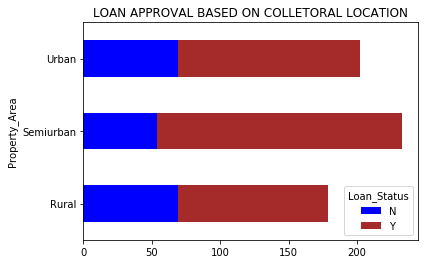

In [9]:
#BASIC VISUALIZATIONS


# The Colletoral Area graph to show loan Approval and Decline
Colletoral = pd.crosstab(train['Property_Area'],train['Loan_Status'])
Colletoral.plot(kind='barh', stacked=True, color=['blue','brown'], title='LOAN APPROVAL BASED ON COLLETORAL LOCATION');
plt.rcParams["figure.figsize"] = (10,7)
plt.savefig ('LOAN APPROVAL BASED ON COLLETORAL LOCATION')

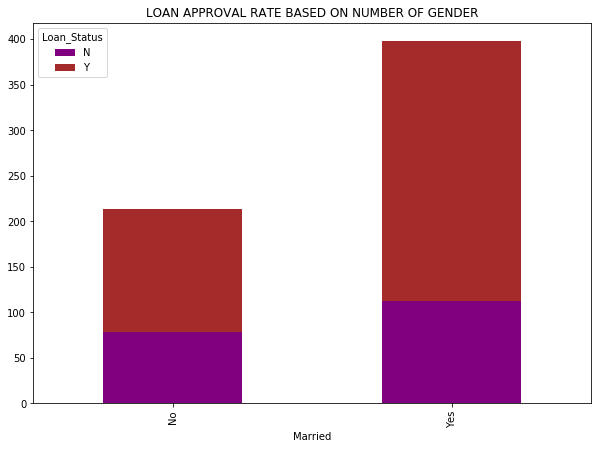

In [10]:
#BASIC VISUALIZATIONS

# The Colletoral Area graph to show loan Approval and Decline
Colletoral = pd.crosstab(train['Married'],train['Loan_Status'])
Colletoral.plot(kind='bar', stacked=True, color=['purple','brown'], title='LOAN APPROVAL RATE BASED ON NUMBER OF GENDER');
plt.rcParams["figure.figsize"] = (10,7)
plt.savefig ('GENDER WITH HIGHEST LOAN APPROVAL RATE')

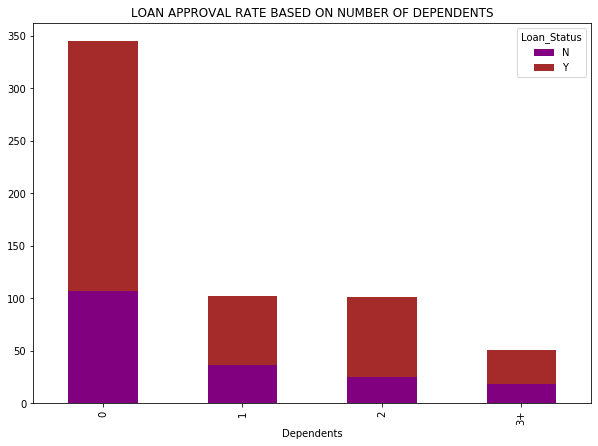

In [11]:
#BASIC VISUALIZATIONS

# The Colletoral Area graph to show loan Approval and Decline
Colletoral = pd.crosstab(train['Dependents'],train['Loan_Status'])
Colletoral.plot(kind='bar', stacked=True, color=['purple','brown'], title='LOAN APPROVAL RATE BASED ON NUMBER OF DEPENDENTS');
plt.rcParams["figure.figsize"] = (10,7)
plt.savefig ('LOAN APPROVAL RATE BASED ON NUMBER OF DEPENDENTS')

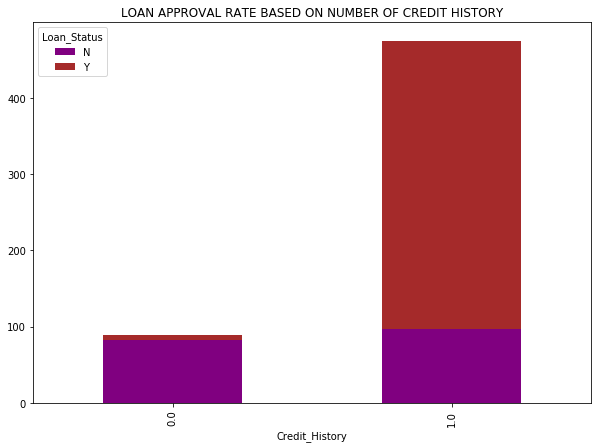

In [12]:
#BASIC VISUALIZATIONS

# The Colletoral Area graph to show loan Approval and Decline
Colletoral = pd.crosstab(train['Credit_History'],train['Loan_Status'])
Colletoral.plot(kind='bar', stacked=True, color=['purple','brown'], title='LOAN APPROVAL RATE BASED ON NUMBER OF CREDIT HISTORY');
plt.rcParams["figure.figsize"] = (10,7)
plt.savefig ('LOAN APPROVAL RATE BASED ON NUMBER OF CREDIT HISTORY')

In [13]:
#Saving my loan ID column before i drop it
loanidtrain = train.iloc[:,0:1]
loanidtest = test.iloc[:,0:1]
loanidtrain.head(1)

,Loan_ID
0,LP001002


In [14]:
train = train.drop(['Loan_ID'], axis = 1)

test = test.drop(['Loan_ID'], axis = 1)

In [15]:
#filling the categorical columns

train['Gender'].fillna(train['Gender'].mode()[0], inplace = True)
test['Gender'].fillna(train['Gender'].mode()[0], inplace = True)
train['Married'].fillna(train['Married'].mode()[0], inplace = True)
test['Married'].fillna(test['Married'].mode()[0], inplace = True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace = True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace = True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace = True)
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace = True)

In [16]:
#filling the numerical columns

train['LoanAmount'].fillna(train['LoanAmount'].mean(), inplace = True)
test['LoanAmount'].fillna(test['LoanAmount'].mean(), inplace = True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mean(), inplace = True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mean(), inplace = True)
train['Credit_History'].fillna(train['Credit_History'].mean(), inplace = True)
test['Credit_History'].fillna(test['Credit_History'].mean(), inplace = True)

In [17]:
train.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [18]:
test.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [19]:

le = LabelEncoder()
train['Loan_Status'] = le.fit_transform(train['Loan_Status'])
train['Gender'] = le.fit_transform(train['Gender'])
train['Married'] = le.fit_transform(train['Married'])
train['Education'] = le.fit_transform(train['Education'])
train['Self_Employed'] = le.fit_transform(train['Self_Employed'])
train['Property_Area'] = le.fit_transform(train['Property_Area'])

In [20]:
test['Gender'] = le.fit_transform(test['Gender'])
test['Married'] = le.fit_transform(test['Married'])
test['Education'] = le.fit_transform(test['Education'])
test['Self_Employed'] = le.fit_transform(test['Self_Employed'])
test['Property_Area'] = le.fit_transform(test['Property_Area'])

In [21]:
le = LabelEncoder()
train['Dependents'] = le.fit_transform(train['Dependents'])

In [22]:
test['Dependents'] = le.fit_transform(test['Dependents'])

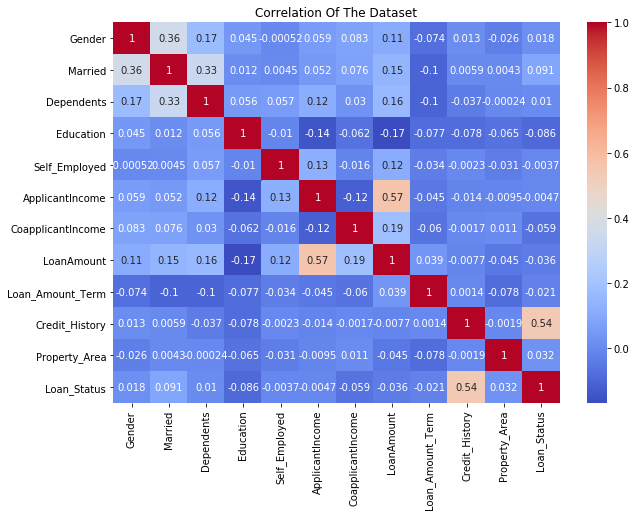

In [23]:
#A correlation graph

corr = train.corr()
sns.heatmap(corr, cmap= 'coolwarm', annot = True)
plt.rcParams["figure.figsize"] = (11,11)
plt.title('Correlation Of The Dataset')
#plt.savefig ('Correlation Of The Dataset')
plt.show()

In [24]:
# my dependent column

y = train.iloc[:,11:12]
y['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [25]:
#my independent column

x = train.drop(['Loan_Status'], axis = 1)
x.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2
5,1,1,2,0,1,5417,4196.0,267.000000,360.0,1.0,2
6,1,1,0,1,0,2333,1516.0,95.000000,360.0,1.0,2
7,1,1,3,0,0,3036,2504.0,158.000000,360.0,0.0,1
8,1,1,2,0,0,4006,1526.0,168.000000,360.0,1.0,2
9,1,1,1,0,0,12841,10968.0,349.000000,360.0,1.0,1


[0.02215977 0.01962945 0.0603215  0.02032862 0.02101467 0.17467399
 0.11446474 0.17048129 0.05178617 0.29399037 0.05114943]


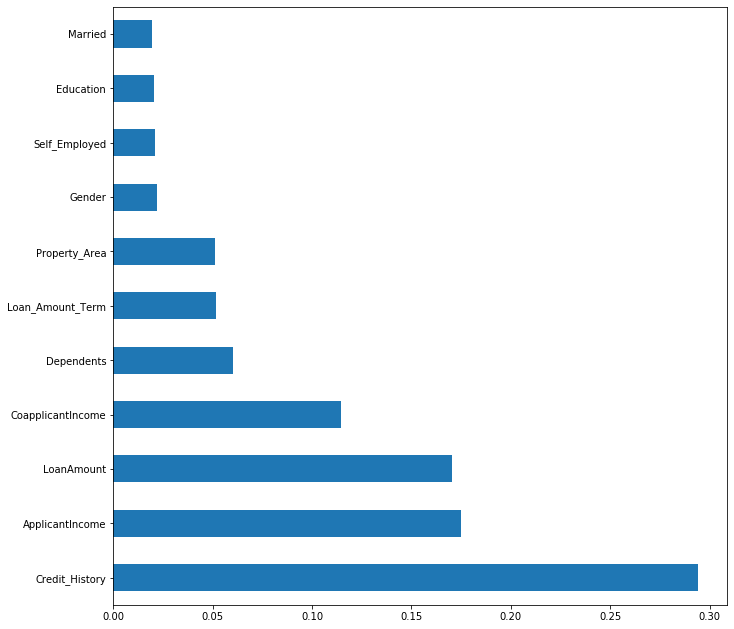

In [26]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(16).plot(kind='barh')
plt.show()

In [27]:
# Dropping this columns because from my feature importance plot i can see they aren't really important in getting our output

x = x.drop(['Gender','Married','Education','Self_Employed'], axis = 1)

test = test.drop(['Gender','Married','Education','Self_Employed'], axis = 1)

In [28]:
x.head(1)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,5849,0.0,146.412162,360.0,1.0,2


In [29]:
y.head(1)

,Loan_Status
0,1


In [30]:
le = LabelEncoder()
y['Loan_Status'] = le.fit_transform(y['Loan_Status'])

y.head(1)

,Loan_Status
0,1


In [31]:
test.head(1)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,5720,0,110.0,360.0,1.0,2


In [32]:
#using the get dummies on categorical columns with more than two categorial value

x = pd.get_dummies(data = x, columns = ['Dependents', 'Property_Area'])
x.head(1)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_0,Dependents_1,Dependents_2,Dependents_3,Property_Area_0,Property_Area_1,Property_Area_2
0,5849,0.0,146.412162,360.0,1.0,1,0,0,0,0,0,1


In [33]:
#Also doing it on my test set

test = pd.get_dummies(data = test, columns = ['Dependents', 'Property_Area'])
test.head(1)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_0,Dependents_1,Dependents_2,Dependents_3,Property_Area_0,Property_Area_1,Property_Area_2
0,5720,0,110.0,360.0,1.0,1,0,0,0,0,0,1


# SCALING MY TRAIN X and ALSO THE TEST

In [34]:
from sklearn.preprocessing import StandardScaler  #MinMaxScaler

In [35]:
scale = StandardScaler()
x = scale.fit_transform(x)
test= scale.fit_transform(test)

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x,y, test_size =0.3, random_state = 42)

In [39]:
y_train['Loan_Status'].value_counts()

1    302
0    127
Name: Loan_Status, dtype: int64

In [40]:
y_val['Loan_Status'].value_counts()

1    120
0     65
Name: Loan_Status, dtype: int64

# BALANCING YOUR DATA SET BEFORE FITING AND PREDICTION

0.7891891891891892
[[ 30  35]
 [  4 116]]
              precision    recall  f1-score   support

           0       0.88      0.46      0.61        65
           1       0.77      0.97      0.86       120

    accuracy                           0.79       185
   macro avg       0.83      0.71      0.73       185
weighted avg       0.81      0.79      0.77       185



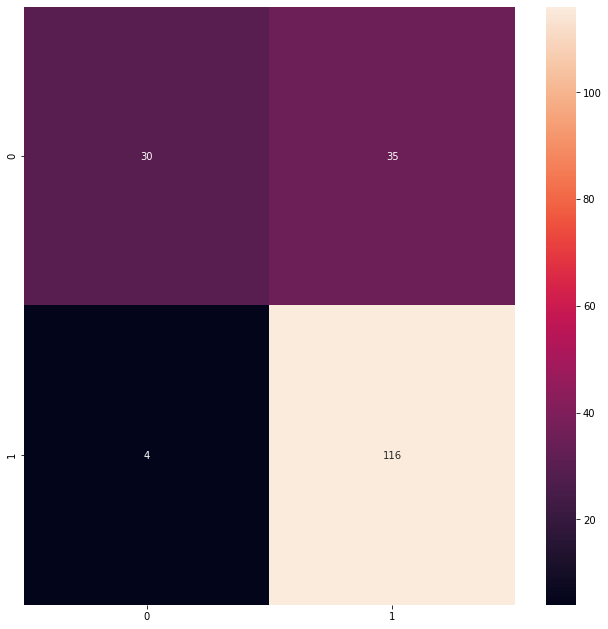

In [51]:
model = GaussianNB()
model.fit(x_train, y_train)
predictions = model.predict(x_val)
predictions

print(accuracy_score(y_val, predictions))
print(confusion_matrix(y_val, predictions))
print(classification_report(y_val, predictions))
cm = confusion_matrix(y_val, predictions)                           
sns.heatmap(cm, annot=True, fmt='d');

In [52]:
pred = bbc.predict(test)
pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
#Predicting on the test
pred = model.predict(test)
pred

# Dataset to be submitted

In [53]:
#xfinal = pd.DataFrame({'Loan_ID': loanidtest['Loan_ID']})
yfinal = pd.DataFrame({'Loan_Status' :pred})

In [54]:
yfinal.head(10)

,Loan_Status
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,0
8,1
9,1


In [55]:
test2 = pd.read_csv('test_Y3wMUE5_7gLdaTN.csv')

In [56]:
my_submission = pd.concat([test2, yfinal], axis ='columns')

In [57]:
my_submission['Loan_Status'].value_counts()

1    274
0     93
Name: Loan_Status, dtype: int64

In [58]:

my_submission['Loan_Status'] = my_submission['Loan_Status'].replace([1],'Y')

In [59]:
my_submission['Loan_Status'] = my_submission['Loan_Status'].replace([0],'N')

# NOW MY MODEL HAS BEEN TESTED ON THE TEST DATASET AND THIS IS THE FINAL OUTPUT

In [60]:
my_submission.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,Y
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Y
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,Y
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,Y
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,Y
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban,Y
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban,Y
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural,N
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban,Y
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban,Y
